In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import codecs

In [3]:
fraud_df = pd.read_csv('data/Jalan_Ext_Tran_Chargeback_JIR_JALAN_20180605094738.csv', encoding="SHIFT-JIS")
with codecs.open("data/Jalan_Ext_Tran_NOTChargeback_JIR_JALAN_20180607143905.csv", "r", "Shift-JIS", "ignore") as file:
    normal_df = pd.read_table(file, delimiter=",")

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def overprice(row, price):
    if row['トランザクション 合計 金額'] > price:
        return True
    else:
        return False

In [5]:
fraud_df['over 50000'] = fraud_df.apply(lambda x: overprice(x,50000), axis=1)
normal_df['over 50000'] = normal_df.apply(lambda x: overprice(x,50000), axis=1)

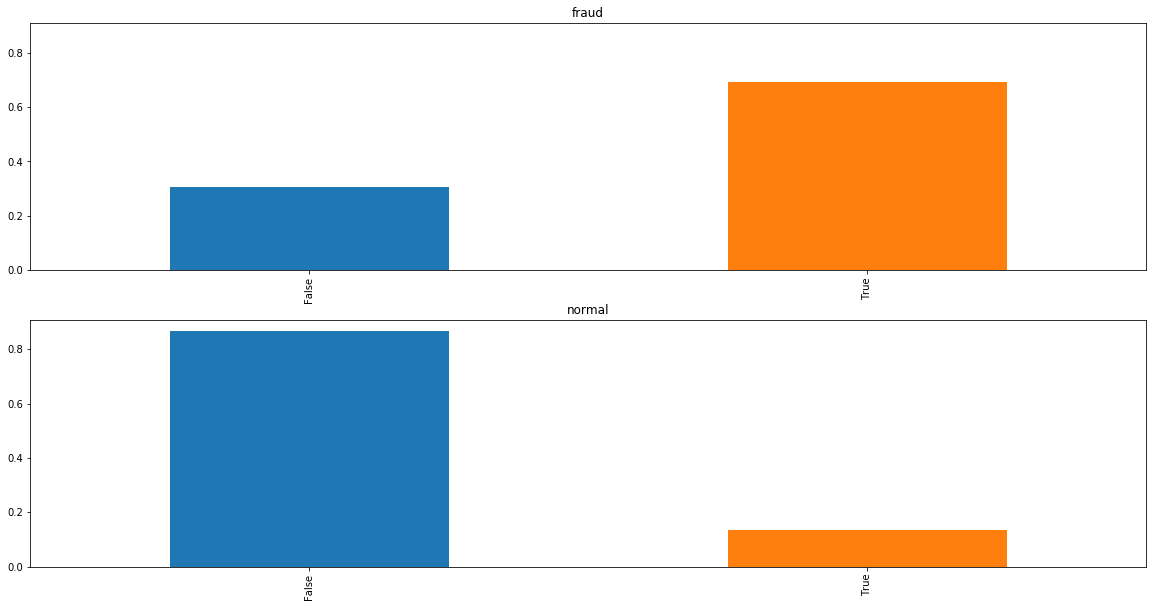

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10),sharey=True)

fraud_ipc = np.divide(fraud_df['over 50000'].value_counts(),fraud_df['over 50000'].count())
normal_ipc = np.divide(normal_df['over 50000'].value_counts(),normal_df['over 50000'].count())

fraud_ipc.sort_index().plot(ax=axes[0],kind='bar',title='fraud')
normal_ipc.sort_index().plot(ax=axes[1],kind='bar',title='normal')

In [7]:
odd1 = fraud_ipc[1]/(1-fraud_ipc[1])
odd2 = normal_ipc[1]/(1-normal_ipc[1])
oddr = odd1/odd2

print("OR :" + str(oddr))

OR :14.64814009750629


In [8]:
fraud_df['over 100000'] = fraud_df.apply(lambda x: overprice(x,100000), axis=1)
normal_df['over 100000'] = normal_df.apply(lambda x: overprice(x,100000), axis=1)


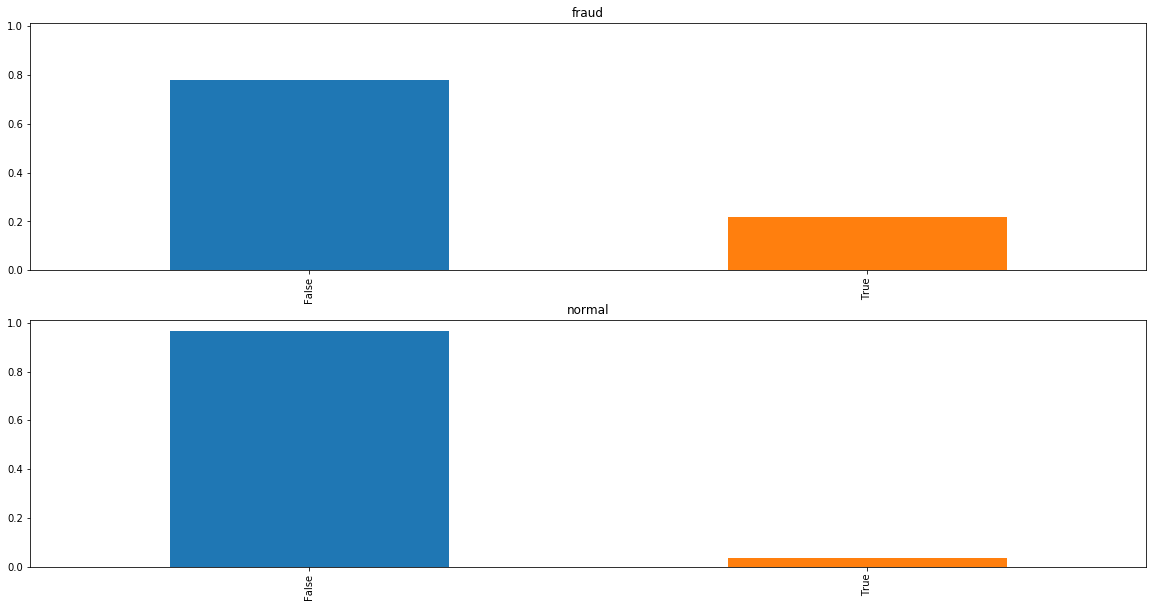

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10),sharey=True)

fraud_ipc = np.divide(fraud_df['over 100000'].value_counts(),fraud_df['over 100000'].count())
normal_ipc = np.divide(normal_df['over 100000'].value_counts(),normal_df['over 100000'].count())

fraud_ipc.sort_index().plot(ax=axes[0],kind='bar',title='fraud')
normal_ipc.sort_index().plot(ax=axes[1],kind='bar',title='normal')

In [10]:
odd1 = fraud_ipc[1]/(1-fraud_ipc[1])
odd2 = normal_ipc[1]/(1-normal_ipc[1])
oddr = odd1/odd2

print("OR :" + str(oddr))

OR :7.653359341781552


In [11]:
fraud_df[fraud_df['トランザクションスコア']<2000]

トランザクションID     RESOLUTION1_NAME   MODIFIED  \
2     2.017100e+19  Chargeback Received  2018/2/23   
6     2.017100e+19  Chargeback Received  2018/2/23   
7     2.018010e+19  Chargeback Received  2018/2/23   
8     2.018010e+19  Chargeback Received  2018/2/23   
14    2.017100e+19  Chargeback Received  2018/2/23   
17    2.018010e+19  Chargeback Received  2018/2/23   
18    2.018010e+19  Chargeback Received  2018/2/23   
19    2.017100e+19  Chargeback Received  2018/2/23   
23    2.017100e+19  Chargeback Received  2018/2/23   
24    2.017100e+19  Chargeback Received  2018/2/23   
27    2.017100e+19  Chargeback Received  2018/2/23   
29    2.017100e+19  Chargeback Received  2018/2/23   
30    2.017100e+19  Chargeback Received  2018/2/23   
34    2.017100e+19  Chargeback Received  2018/2/23   
35    2.017100e+19  Chargeback Received  2018/2/23   
65    2.017120e+19  Chargeback Received  2018/2/23   
66    2.017120e+19  Chargeback Received  2018/2/23   
67    2.017120e+19  Chargeback Received  2018/2/23   
68    2.017120e+19  Chargeback Received  2018/2/23   
84    2.017090e+19  Chargeback Received  2018/3/22   
86    2.017090e+19  Chargeback Received  2018/3/22   
87    2.017100e+19  Chargeback Received  2018/3/22   
94    2.017100e+19  Chargeback Received  2018/3/22   
99    2.017120e+19  Chargeback Received  2018/3/22   
102   2.018010e+19  Chargeback Received  2018/3/22   
108   2.018010e+19  Chargeback Received  2018/3/22   
110   2.017100e+19  Chargeback Received  2018/3/22   
117   2.017100e+19  Chargeback Received  2018/3/22   
121   2.017100e+19  Chargeback Received  2018/3/22   
122   2.017100e+19  Chargeback Received  2018/3/22   
...            ...                  ...        ...   
1149  2.018010e+19  Chargeback Received   2018/6/4   
1151  2.018010e+19  Chargeback Received   2018/6/4   
1152  2.018010e+19  Chargeback Received   2018/6/4   
1153  2.018010e+19  Chargeback Received   2018/6/4   
1154  2.018010e+19  Chargeback Received   2018/6/4   
1157  2.018010e+19  Chargeback Received   2018/6/4   
1159  2.018010e+19  Chargeback Received   2018/6/4   
1160  2.018010e+19  Chargeback Received   2018/6/4   
1161  2.018010e+19  Chargeback Received   2018/6/4   
1165  2.018010e+19  Chargeback Received   2018/6/4   
1173  2.018010e+19  Chargeback Received   2018/6/4   
1186  2.018010e+19  Chargeback Received   2018/6/4   
1189  2.018010e+19  Chargeback Received   2018/6/4   
1199  2.018010e+19  Chargeback Received   2018/6/4   
1203  2.018010e+19  Chargeback Received   2018/6/4   
1204  2.018010e+19  Chargeback Received   2018/6/4   
1213  2.018010e+19  Chargeback Received   2018/6/4   
1252  2.018010e+19  Chargeback Received   2018/6/4   
1272  2.018010e+19  Chargeback Received   2018/6/4   
1290  2.018020e+19  Chargeback Received   2018/6/4   
1295  2.018020e+19  Chargeback Received   2018/6/4   
1296  2.018020e+19  Chargeback Received   2018/6/4   
1396  2.018050e+19  Chargeback Received   2018/6/4   
1397  2.018050e+19  Chargeback Received   2018/6/4   
1429  2.018020e+19  Chargeback Received   2018/6/4   
1440  2.018020e+19  Chargeback Received   2018/6/4   
1458  2.018020e+19  Chargeback Received   2018/6/4   
1459  2.018020e+19  Chargeback Received   2018/6/4   
1461  2.018020e+19  Chargeback Received   2018/6/4   
1462  2.018020e+19  Chargeback Received   2018/6/4   

      NULLは新規分\n0605森田さん追加\nCB情報              会員ID          クレジットカード名義  \
2                   2.017100e+19  TRA2050032907339  Natsumi  Nishimura   
6                   2.017100e+19  TRA6650032819561        Asami  Araki   
7                   2.018010e+19  TRA8690033355949                 NaN   
8                   2.018010e+19  TRA5350033356194        Hiroo Kanaya   
14                  2.017100e+19  TRA5430032833508                 NaN   
17                  2.018010e+19  TRA4040033393744            Ryo Aoki   
18                  2.018010e+19  TRA3320033457400        Mariko Oyama   
19                  2.017100e+19  TRA4780032895175                 

In [16]:
fraud_df['トランザクション 日時'] = pd.to_datetime(fraud_df['トランザクション 日時'])
normal_df['トランザクション 日時'] = pd.to_datetime(normal_df['トランザクション 日時'])

fraud_df['会員登録日時'] = pd.to_datetime(fraud_df['会員登録日時'])
normal_df['会員登録日時'] = pd.to_datetime(normal_df['会員登録日時'])

In [17]:
fraud_df['dtime'] = fraud_df['トランザクション 日時'] - fraud_df['会員登録日時']
normal_df['dtime'] = normal_df['トランザクション 日時'] - normal_df['会員登録日時']

In [47]:
fraud_df2 = fraud_df[fraud_df.dtime.notnull()]
normal_df2 = normal_df[normal_df.dtime.notnull()]

In [48]:
fraud_df2

トランザクションID     RESOLUTION1_NAME   MODIFIED  \
1     2.017090e+19  Chargeback Received  2018/2/23   
2     2.017100e+19  Chargeback Received  2018/2/23   
3     2.017110e+19  Chargeback Received  2018/2/23   
4     2.017090e+19  Chargeback Received  2018/2/23   
5     2.017090e+19  Chargeback Received  2018/2/23   
6     2.017100e+19  Chargeback Received  2018/2/23   
7     2.018010e+19  Chargeback Received  2018/2/23   
8     2.018010e+19  Chargeback Received  2018/2/23   
9     2.017090e+19  Chargeback Received  2018/2/23   
10    2.017100e+19  Chargeback Received  2018/2/23   
11    2.017100e+19  Chargeback Received  2018/2/23   
12    2.017100e+19  Chargeback Received  2018/2/23   
13    2.017100e+19  Chargeback Received  2018/2/23   
14    2.017100e+19  Chargeback Received  2018/2/23   
15    2.017100e+19  Chargeback Received  2018/2/23   
16    2.017110e+19  Chargeback Received  2018/2/23   
17    2.018010e+19  Chargeback Received  2018/2/23   
18    2.018010e+19  Chargeback Received  2018/2/23   
19    2.017100e+19  Chargeback Received  2018/2/23   
20    2.017100e+19  Chargeback Received  2018/2/23   
21    2.017100e+19  Chargeback Received  2018/2/23   
22    2.017100e+19  Chargeback Received  2018/2/23   
23    2.017100e+19  Chargeback Received  2018/2/23   
24    2.017100e+19  Chargeback Received  2018/2/23   
25    2.017100e+19  Chargeback Received  2018/2/23   
26    2.017110e+19  Chargeback Received  2018/2/23   
27    2.017100e+19  Chargeback Received  2018/2/23   
28    2.017100e+19  Chargeback Received  2018/2/23   
29    2.017100e+19  Chargeback Received  2018/2/23   
30    2.017100e+19  Chargeback Received  2018/2/23   
...            ...                  ...        ...   
1541  2.018030e+19  Chargeback Received   2018/6/4   
1542  2.018030e+19  Chargeback Received   2018/6/4   
1543  2.018030e+19  Chargeback Received   2018/6/4   
1544  2.018030e+19  Chargeback Received   2018/6/4   
1545  2.018030e+19  Chargeback Received   2018/6/4   
1546  2.018030e+19  Chargeback Received   2018/6/4   
1547  2.018030e+19  Chargeback Received   2018/6/4   
1548  2.018030e+19  Chargeback Received   2018/6/4   
1549  2.018030e+19  Chargeback Received   2018/6/4   
1550  2.018030e+19  Chargeback Received   2018/6/4   
1551  2.018030e+19  Chargeback Received   2018/6/4   
1552  2.018030e+19  Chargeback Received   2018/6/4   
1553  2.018030e+19  Chargeback Received   2018/6/4   
1554  2.018030e+19  Chargeback Received   2018/6/4   
1555  2.018030e+19  Chargeback Received   2018/6/4   
1556  2.018030e+19  Chargeback Received   2018/6/4   
1557  2.018030e+19  Chargeback Received   2018/6/4   
1558  2.018030e+19  Chargeback Received   2018/6/4   
1559  2.018030e+19  Chargeback Received   2018/6/4   
1560  2.018030e+19  Chargeback Received   2018/6/4   
1561  2.018030e+19  Chargeback Received   2018/6/4   
1562  2.018030e+19  Chargeback Received   2018/6/4   
1563  2.018030e+19  Chargeback Received   2018/6/4   
1564  2.018030e+19  Chargeback Received   2018/6/4   
1565  2.018030e+19  Chargeback Received   2018/6/4   
1566  2.018030e+19  Chargeback Received   2018/6/4   
1567  2.018030e+19  Chargeback Received   2018/6/4   
1568  2.018030e+19  Chargeback Received   2018/6/4   
1569  2.018030e+19  Chargeback Received   2018/6/4   
1570  2.018050e+19  Chargeback Received   2018/6/4   

      NULLは新規分\n0605森田さん追加\nCB情報              会員ID          クレジットカード名義  \
1                   2.017090e+19  TRA1150029926548                 NaN   
2                   2.017100e+19  TRA2050032907339  Natsumi  Nishimura   
3                   2.017110e+19  TRA6000033144894         kojiro Wada   
4                   2.017090e+19  TRA9340032792810                 NaN   
5                   2.017090e+19  TRA5070032813303                 NaN   
6                   2.017100e+19  TRA6650032819561        Asami  Araki   
7                   2.018010e+19  TRA8690033355949                 NaN   
8                   2.018010e+19  TRA5350033356194        Hiroo Kan

In [49]:
fraud_over24 = len(fraud_df2[fraud_df2['dtime'] > '1days'])
fraud_under24 = len(fraud_df2[fraud_df2['dtime'] <= '1days'])

normal_over24 = len(normal_df2[normal_df2['dtime'] > '1days'])
normal_under24 = len(normal_df2[normal_df2['dtime'] <= '1days'])

In [50]:
fraud_under24

1327

In [51]:
odd1 = fraud_under24/fraud_over24
odd2 = normal_under24/normal_over24
oddr = odd1/odd2

print("OR :" + str(oddr))

OR :145.69341160237929


In [57]:
fraud_ipdf = fraud_df[['InAuth デバイス 実IPアドレス','Billing Emailアドレス','トランザクション 日時']]

In [67]:
fraud_ipdf['rule tripped'] = False

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
label = fraud_df['InAuth デバイス 実IPアドレス'].unique()
DataFrameDict = {elem : pd.DataFrame for elem in label}
DataFrameDict2 = {elem : pd.DataFrame for elem in label}
for key in DataFrameDict.keys():
    DataFrameDict[key] = fraud_df[:][fraud_df['InAuth デバイス 実IPアドレス'] == key]

for key in DataFrameDict.keys():
    label2 = DataFrameDict[key]['Billing Emailアドレス'].unique()
    DataFrameDict2 = {elem : pd.DataFrame for elem in label2}
    
    for key2 in DataFrameDict2.keys():
        DataFrameDict2[key2] = DataFrameDict[key][:][DataFrameDict[key]['Billing Emailアドレス'] == key]
        
    for key2 in DataFrameDict2.keys():
        bool1 = False
        for index, row in DataFrameDict2[key2].iterrows():
            bool2 = False
            for key3 in  DataFrameDict2.keys():
                bool3 = False
                if key2 != key3:
                    for index2,row2 in DataFrameDict2[key3].iterrows():
                        if (row['トランザクション 日時'] - row2['トランザクション 日時']) < '1days' or (row2['トランザクション 日時'] - row['トランザクション 日時']) < '1days':
                            fraud_ipdf[fraud_ipdf['InAuth デバイス 実IPアドレス']]['rule tripped'] = True
                            bool1 = True
                            bool2 = True
                            bool3 = False
                            break
                if bool3 == True:
                    break
                
            if bool2 == True:
                break
                
        if bool1 == True:
            break
                

In [77]:
fraud_ipdf[fraud_ipdf['rule tripped'] == True]

Empty DataFrame
Columns: [InAuth デバイス 実IPアドレス, Billing Emailアドレス, トランザクション 日時, rule tripped]
Index: []

In [63]:
fraud_df['Billing Emailアドレス'] = fraud_df['Billing Emailアドレス'].fillna('')
normal_df['Billing Emailアドレス'] = normal_df['Billing Emailアドレス'].fillna('')

fraud_df['メール数字'] = fraud_df.apply(lambda x: bool(re.match("\d", x['Billing Emailアドレス'])),axis=1)
normal_df['メール数字'] = normal_df.apply(lambda x: bool(re.match("\d", x['Billing Emailアドレス'])),axis=1)

In [64]:
fraud_df

トランザクションID     RESOLUTION1_NAME   MODIFIED  \
0     2.017100e+19  Chargeback Received   2018/1/9   
1     2.017090e+19  Chargeback Received  2018/2/23   
2     2.017100e+19  Chargeback Received  2018/2/23   
3     2.017110e+19  Chargeback Received  2018/2/23   
4     2.017090e+19  Chargeback Received  2018/2/23   
5     2.017090e+19  Chargeback Received  2018/2/23   
6     2.017100e+19  Chargeback Received  2018/2/23   
7     2.018010e+19  Chargeback Received  2018/2/23   
8     2.018010e+19  Chargeback Received  2018/2/23   
9     2.017090e+19  Chargeback Received  2018/2/23   
10    2.017100e+19  Chargeback Received  2018/2/23   
11    2.017100e+19  Chargeback Received  2018/2/23   
12    2.017100e+19  Chargeback Received  2018/2/23   
13    2.017100e+19  Chargeback Received  2018/2/23   
14    2.017100e+19  Chargeback Received  2018/2/23   
15    2.017100e+19  Chargeback Received  2018/2/23   
16    2.017110e+19  Chargeback Received  2018/2/23   
17    2.018010e+19  Chargeback Received  2018/2/23   
18    2.018010e+19  Chargeback Received  2018/2/23   
19    2.017100e+19  Chargeback Received  2018/2/23   
20    2.017100e+19  Chargeback Received  2018/2/23   
21    2.017100e+19  Chargeback Received  2018/2/23   
22    2.017100e+19  Chargeback Received  2018/2/23   
23    2.017100e+19  Chargeback Received  2018/2/23   
24    2.017100e+19  Chargeback Received  2018/2/23   
25    2.017100e+19  Chargeback Received  2018/2/23   
26    2.017110e+19  Chargeback Received  2018/2/23   
27    2.017100e+19  Chargeback Received  2018/2/23   
28    2.017100e+19  Chargeback Received  2018/2/23   
29    2.017100e+19  Chargeback Received  2018/2/23   
...            ...                  ...        ...   
1541  2.018030e+19  Chargeback Received   2018/6/4   
1542  2.018030e+19  Chargeback Received   2018/6/4   
1543  2.018030e+19  Chargeback Received   2018/6/4   
1544  2.018030e+19  Chargeback Received   2018/6/4   
1545  2.018030e+19  Chargeback Received   2018/6/4   
1546  2.018030e+19  Chargeback Received   2018/6/4   
1547  2.018030e+19  Chargeback Received   2018/6/4   
1548  2.018030e+19  Chargeback Received   2018/6/4   
1549  2.018030e+19  Chargeback Received   2018/6/4   
1550  2.018030e+19  Chargeback Received   2018/6/4   
1551  2.018030e+19  Chargeback Received   2018/6/4   
1552  2.018030e+19  Chargeback Received   2018/6/4   
1553  2.018030e+19  Chargeback Received   2018/6/4   
1554  2.018030e+19  Chargeback Received   2018/6/4   
1555  2.018030e+19  Chargeback Received   2018/6/4   
1556  2.018030e+19  Chargeback Received   2018/6/4   
1557  2.018030e+19  Chargeback Received   2018/6/4   
1558  2.018030e+19  Chargeback Received   2018/6/4   
1559  2.018030e+19  Chargeback Received   2018/6/4   
1560  2.018030e+19  Chargeback Received   2018/6/4   
1561  2.018030e+19  Chargeback Received   2018/6/4   
1562  2.018030e+19  Chargeback Received   2018/6/4   
1563  2.018030e+19  Chargeback Received   2018/6/4   
1564  2.018030e+19  Chargeback Received   2018/6/4   
1565  2.018030e+19  Chargeback Received   2018/6/4   
1566  2.018030e+19  Chargeback Received   2018/6/4   
1567  2.018030e+19  Chargeback Received   2018/6/4   
1568  2.018030e+19  Chargeback Received   2018/6/4   
1569  2.018030e+19  Chargeback Received   2018/6/4   
1570  2.018050e+19  Chargeback Received   2018/6/4   

      NULLは新規分\n0605森田さん追加\nCB情報              会員ID          クレジットカード名義  \
0                   2.017100e+19                 0     Hiroki  Yoshino   
1                   2.017090e+19  TRA1150029926548                 NaN   
2                   2.017100e+19  TRA2050032907339  Natsumi  Nishimura   
3                   2.017110e+19  TRA6000033144894         kojiro Wada   
4                   2.017090e+19  TRA9340032792810                 NaN   
5                   2.017090e+19  TRA5070032813303                 NaN   
6                   2.017100e+19  TRA6650032819561        Asami  Araki   
7                   2.018010e+19  TRA8690033355949                 

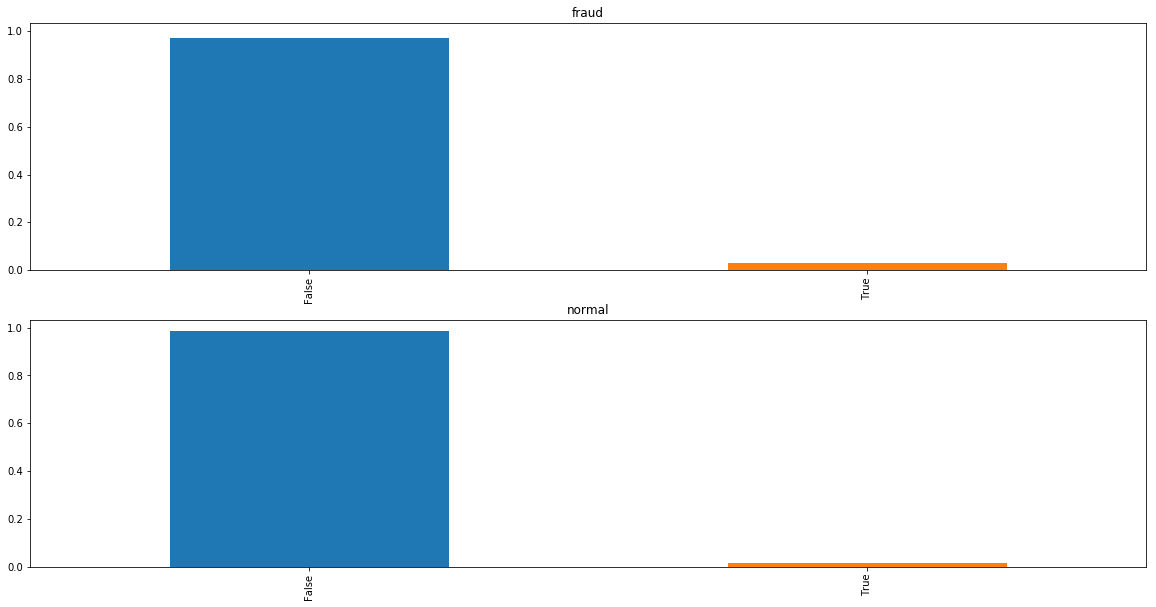

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10),sharey=True)

fraud_ipc = np.divide(fraud_df['メール数字'].value_counts(),fraud_df['メール数字'].count())
normal_ipc = np.divide(normal_df['メール数字'].value_counts(),normal_df['メール数字'].count())

fraud_ipc.sort_index().plot(ax=axes[0],kind='bar',title='fraud')
normal_ipc.sort_index().plot(ax=axes[1],kind='bar',title='normal')

In [66]:
odd1 = fraud_ipc[1]/(1-fraud_ipc[1])
odd2 = normal_ipc[1]/(1-normal_ipc[1])
oddr = odd1/odd2

print("OR :" + str(oddr))

OR :1.8489916157125785
